## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

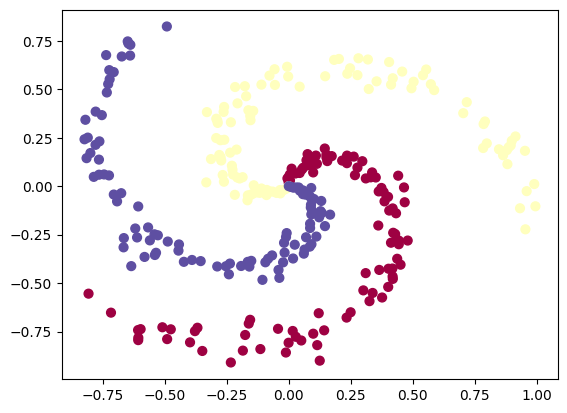

In [1]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

In [2]:
# Type your code here
def compute_scores(X, W, b):
    return X.dot(W) + b


### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [3]:
# Type your code here
def svm_loss(X, y, W, b, reg):
    scores = compute_scores(X, W, b)
    num_train = X.shape[0]
    correct_class_scores = scores[range(num_train), y].reshape(-1, 1)
    margins = np.maximum(0, scores - correct_class_scores + 1)
    margins[range(num_train), y] = 0
    loss = np.sum(margins) / num_train
    loss += reg * np.sum(W * W)
    return loss

def softmax_loss(X, y, W, b, reg):
    scores = compute_scores(X, W, b)
    scores -= np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    num_train = X.shape[0]
    correct_log_probs = -np.log(probs[range(num_train), y])
    loss = np.sum(correct_log_probs) / num_train
    loss += reg * np.sum(W * W)
    return loss






### Task 3: Regularization
Add L2 regularization to your loss function.

In [4]:
# Type your code here
def gradient_descent(X, y, W, b, reg, learning_rate, num_iters):
    num_train = X.shape[0]
    for i in range(num_iters):
        scores = compute_scores(X, W, b)
        scores -= np.max(scores, axis=1, keepdims=True)
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        dscores = probs
        dscores[range(num_train), y] -= 1
        dscores /= num_train
        
        dW = X.T.dot(dscores)
        db = np.sum(dscores, axis=0)
        
        dW += 2 * reg * W  # Regularization gradient
        
        W -= learning_rate * dW
        b -= learning_rate * db
    
    return W, b





### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

Epoch 0, Loss: 1.1258742809295654
Epoch 500, Loss: 0.16318495571613312
Epoch 1000, Loss: 0.12419792264699936
Epoch 1500, Loss: 0.11501231789588928
Epoch 2000, Loss: 0.11205525696277618
Epoch 2500, Loss: 0.1105964407324791
Epoch 3000, Loss: 0.10971098393201828
Epoch 3500, Loss: 0.10941264778375626
Epoch 4000, Loss: 0.10926199704408646
Epoch 4500, Loss: 0.10915608704090118


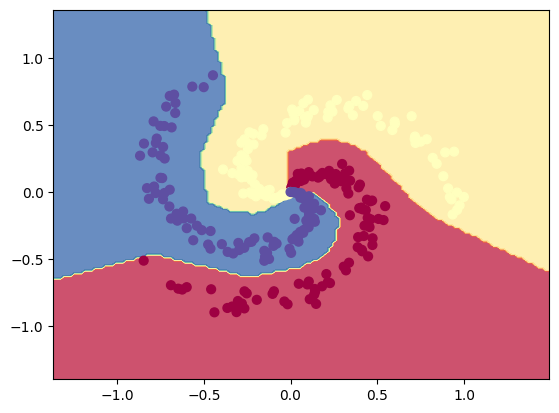

In [2]:
# Type your code here

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Generate spiral dataset
N = 100  # number of points per class
D = 2    # dimensionality
K = 3    # number of classes
X = np.zeros((N*K,D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# Convert data to torch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

# Define a simple neural network model
class SimpleNN(nn.Module):
    def __init__(self, D, h, K):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(D, h)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(h, K)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the neural network, loss function, and optimizer
model = SimpleNN(D=2, h=100, K=3)  # Hidden layer with 100 neurons
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=1.0, weight_decay=1e-3)

# Train the neural network
num_epochs = 5000
for epoch in range(num_epochs):
    # Forward pass
    scores = model(X_tensor)
    loss = criterion(scores, y_tensor)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Visualize the decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_grid = np.c_[xx.ravel(), yy.ravel()]
X_grid_tensor = torch.tensor(X_grid, dtype=torch.float32)
Z = model(X_grid_tensor)
_, predicted_labels = torch.max(Z, 1)
Z = predicted_labels.detach().numpy().reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()









### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
